In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\COMMAT_classification sc\code\DATASET_ weka_679.csv")

In [3]:
df['SSA(m2/g)'] = df['SSA(m2/g)']/1000

In [4]:
df.head()

,SSA(m2/g),Pore size(nm),Pore Volume (cm3/g),Potential,Nitrogen %,Id/Ig,Specific Capacitance
0,0.63,1.50,0.0,0.25,0.0,0.0,80.0
1,1.00,1.75,0.0,0.25,0.0,0.0,125.0
2,1.50,2.50,0.0,0.25,0.0,0.0,175.0
3,1.40,2.90,0.0,0.25,0.0,0.0,160.0
4,0.85,1.25,0.0,0.25,0.0,0.0,95.0


In [5]:
df = df.rename(columns={'SSA(m2/g)': 'SSA','Pore size(nm)': 'PS', 'Pore Volume (cm3/g)': 'PV' , 'Nitrogen %':'NC' ,  'Specific Capacitance':'SC'})

In [6]:
df.head()

,SSA,PS,PV,Potential,NC,Id/Ig,SC
0,0.63,1.50,0.0,0.25,0.0,0.0,80.0
1,1.00,1.75,0.0,0.25,0.0,0.0,125.0
2,1.50,2.50,0.0,0.25,0.0,0.0,175.0
3,1.40,2.90,0.0,0.25,0.0,0.0,160.0
4,0.85,1.25,0.0,0.25,0.0,0.0,95.0


In [7]:
df.describe()

,SSA,PS,PV,Potential,NC,Id/Ig,SC
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000
mean,1.166802,1.714821,0.867994,1.296057,1.329385,0.555733,188.130824
std,0.883202,2.616503,0.861877,0.792527,2.875535,0.798127,104.478231
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.461500,0.000000,0.238000,1.000000,0.000000,0.000000,120.000000
50%,1.016700,0.900000,0.690000,1.000000,0.000000,0.000000,176.500000
75%,1.641000,2.522500,1.295000,1.000000,1.137500,0.997500,247.750000
max,4.073000,27.200000,5.910000,4.000000,19.800000,4.540000,587.000000


In [8]:
# To select all columns except the last one for X1, and the last column for y1:
X = df.iloc[:, :-1]  # Select all columns except the last one for features (X1)
y = df.iloc[:, -1]   # Select the last column as the target (y1)

In [9]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split, learning_curve
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train

,SSA,PS,PV,Potential,NC,Id/Ig
182,0.477,1.96,0.230,1.0,0.00,1.01
89,0.000,0.00,0.000,0.8,0.00,1.12
185,2.086,2.10,1.100,1.0,0.00,0.00
148,1.578,0.00,1.092,1.2,0.68,0.00
204,0.521,0.00,0.380,1.0,7.30,1.00
...,...,...,...,...,...,...
71,3.110,0.70,1.680,1.0,0.00,0.00
106,0.787,5.81,1.140,1.0,0.00,0.00
270,1.588,0.00,1.010,0.9,5.30,0.84
435,1.417,2.22,1.560,1.0,1.99,1.01


In [11]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [12]:

model1 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model1.fit(X_train, y_train)

# -----------------------------
# Predictions
# -----------------------------
y_pred = model1.predict(X_test)

# -----------------------------
# Evaluation metrics
# -----------------------------
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score value GB: {r2:.3f}")
print(f"MAE value GB: {mae:.3f}")
print(f"RMSE value GB: {rmse:.3f}")




R² Score value GB: 0.596
MAE value GB: 50.563
RMSE value GB: 65.858


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best Parameters (Gradient Boosting): {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 7, 'learning_rate': 0.05}

Gradient Boosting Regression Performance on Test Data:
R² Score GB Random Search CV: 0.641
MAE GB Random Search CV: 48.423
RMSE GB Random Search CV: 62.097


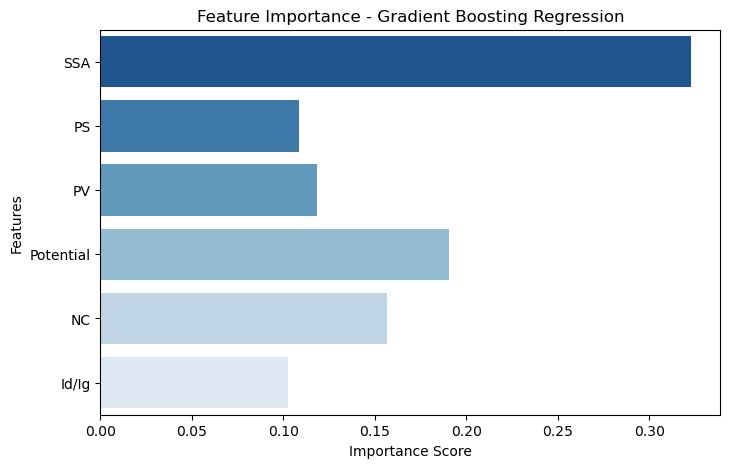

In [13]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
# -----------------------------
# Gradient Boosting Regressor + Random Search CV
# -----------------------------
param_dist = {
    "n_estimators": [50, 100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "subsample": [0.6, 0.8, 1.0],
    "max_features": ["sqrt", "log2", None]
}

gbr = GradientBoostingRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_dist,
    n_iter=50,              # number of random parameter combinations
    cv=10,                  # 10-fold cross-validation
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

# -----------------------------
# Best Model
# -----------------------------
print("Best Parameters (Gradient Boosting):", random_search.best_params_)

best_gbr_rs = random_search.best_estimator_

# -----------------------------
# Predictions
# -----------------------------
y_pred = best_gbr_rs.predict(X_test)

# -----------------------------
# Evaluation metrics
# -----------------------------
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nGradient Boosting Regression Performance on Test Data:")
print(f"R² Score GB Random Search CV: {r2:.3f}")
print(f"MAE GB Random Search CV: {mae:.3f}")
print(f"RMSE GB Random Search CV: {rmse:.3f}")

# -----------------------------
# Feature Importance Visualization
# -----------------------------
plt.figure(figsize=(8,5))
sns.barplot(x=best_gbr_rs.feature_importances_, y=X.columns, palette="Blues_r")
plt.title("Feature Importance - Gradient Boosting Regression")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


Fitting 10 folds for each of 128 candidates, totalling 1280 fits
Best Parameters (Gradient Boosting, Grid Search): {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8}

Gradient Boosting Regression (Grid Search) Performance on Test Data:
R² Score GB Grid Search CV: 0.615
MAE GB Grid Search CV: 49.485
RMSE GB Grid Search CV: 64.305


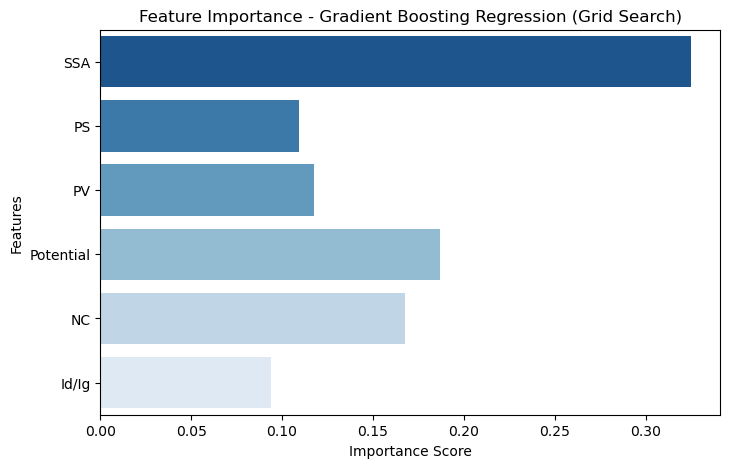

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV

# -----------------------------
# Gradient Boosting Regressor + Grid Search CV
# -----------------------------
param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 5],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "subsample": [0.8, 1.0],
    "max_features": ["sqrt", None]
}

gbr = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=10,
    scoring="r2",
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

# -----------------------------
# Best Model
# -----------------------------
print("Best Parameters (Gradient Boosting, Grid Search):", grid_search.best_params_)

best_gbr_gd = grid_search.best_estimator_

# -----------------------------
# Predictions
# -----------------------------
y_pred = best_gbr_gd.predict(X_test)

# -----------------------------
# Evaluation metrics
# -----------------------------
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nGradient Boosting Regression (Grid Search) Performance on Test Data:")
print(f"R² Score GB Grid Search CV: {r2:.3f}")
print(f"MAE GB Grid Search CV: {mae:.3f}")
print(f"RMSE GB Grid Search CV: {rmse:.3f}")

# -----------------------------
# Feature Importance Visualization
# -----------------------------
plt.figure(figsize=(8,5))
sns.barplot(x=best_gbr_gd.feature_importances_, y=X.columns, palette="Blues_r")
plt.title("Feature Importance - Gradient Boosting Regression (Grid Search)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [15]:
# Get feature importance scores
feature_importances = best_gbr_rs.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print the feature importance scores
print("Feature Importance Scores:")
print(importance_df)

Feature Importance Scores:
     Feature  Importance
0        SSA    0.322752
3  Potential    0.190575
4         NC    0.156838
2         PV    0.118542
1         PS    0.108788
5      Id/Ig    0.102505


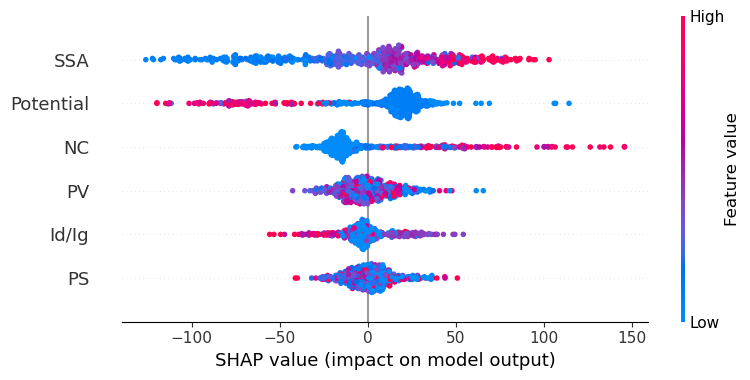

In [16]:
import shap
explainer = shap.TreeExplainer(best_gbr_rs)
shap_values = explainer.shap_values(X)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X)

In [17]:
#y_pred = best_gbr_rs.predict(X_test)
# Make predictions on both train and test data
y_train_pred = best_gbr_rs.predict(X_train)
y_test_pred =best_gbr_rs.predict(X_test)

# Create a DataFrame for better visualization
GB_df = pd.DataFrame({
    'Actual_SC': y_test,
    'Predicted_SC': y_test_pred
})
print(GB_df)
# Save to Excel
GB_df.to_excel('Gradient boost_df.xlsx', index=False)

     Actual_SC  Predicted_SC
158      378.5    348.846275
451      360.0    329.993553
55       156.0    137.840153
247      145.0    102.062693
70       295.0    322.506645
..         ...           ...
11       333.9    238.465112
374      246.0    382.210101
22       225.0    228.051386
381      161.0    135.515019
373      208.0    168.366226

[112 rows x 2 columns]


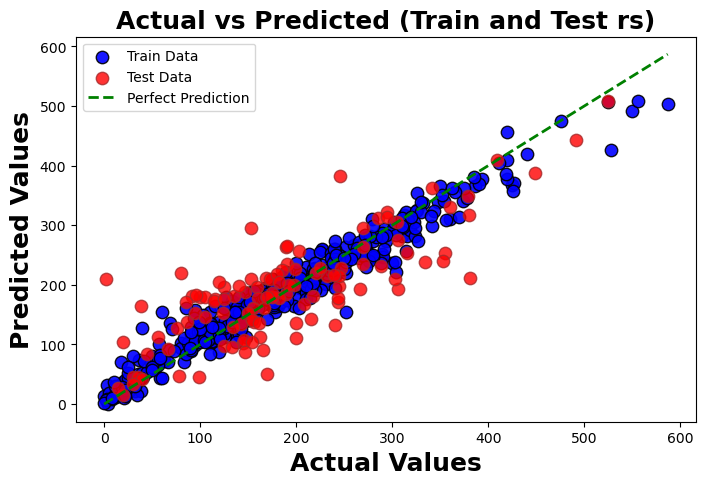

In [18]:
plt.figure(figsize=(8, 5))

# Plot for training data
plt.scatter(y_train, y_train_pred, color='blue',edgecolor="black", s=80, label='Train Data', alpha=0.9)

# Plot for testing data
plt.scatter(y_test, y_test_pred, color='red', edgecolor="brown", s=80, label='Test Data', alpha=0.8)


# Plot a perfect prediction line
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='green', linewidth=2, linestyle='--', label='Perfect Prediction')

# Labels and title
plt.xlabel("Actual Values", fontweight="bold", fontsize=18)  # Bold x-axis label
plt.ylabel("Predicted Values", fontweight="bold", fontsize=18)  # Bold y-axis label
plt.title("Actual vs Predicted (Train and Test rs)", fontweight="bold", fontsize=18)
plt.legend()
plt.show()

In [19]:
y_test_pred =best_gbr_rs.predict(X_test)

# Create a DataFrame for better visualization
GB_df_test = pd.DataFrame({
    'Actual_SC': y_test,
    'Predicted_SC': y_test_pred
})
print(GB_df_test)
# Save to Excel
GB_df_test.to_excel('Gradient boost_test_df.xlsx', index=False)

     Actual_SC  Predicted_SC
158      378.5    348.846275
451      360.0    329.993553
55       156.0    137.840153
247      145.0    102.062693
70       295.0    322.506645
..         ...           ...
11       333.9    238.465112
374      246.0    382.210101
22       225.0    228.051386
381      161.0    135.515019
373      208.0    168.366226

[112 rows x 2 columns]


In [20]:
y_train_pred = best_gbr_rs.predict(X_train)
# Create a DataFrame for better visualization
GB_df_train = pd.DataFrame({
    'Actual_SC': y_train,
    'Predicted_SC': y_train_pred
})
print(GB_df_test)
# Save to Excel
GB_df_train.to_excel('Gradient boost_train_df.xlsx', index=False)

     Actual_SC  Predicted_SC
158      378.5    348.846275
451      360.0    329.993553
55       156.0    137.840153
247      145.0    102.062693
70       295.0    322.506645
..         ...           ...
11       333.9    238.465112
374      246.0    382.210101
22       225.0    228.051386
381      161.0    135.515019
373      208.0    168.366226

[112 rows x 2 columns]
